In [1]:
from google.colab import files
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"vaishakt","key":"b904828175080df78710b0a2cbf458f2"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!pip install kaggle


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedhanyyy/chest-ctscan-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-ctscan-images' dataset.
Path to dataset files: /kaggle/input/chest-ctscan-images


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [7]:
base_dir = '/kaggle/input/chest-ctscan-images/Data'  # Kaggle dataset has a 'Data' folder
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Basic parameters
img_size = (224, 224)
batch_size = 32


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [9]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,595,908 (90.01 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2081 - loss: 1.8842 - val_accuracy: 0.2917 - val_loss: 1.4205
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.2471 - loss: 1.6636 - val_accuracy: 0.3472 - val_loss: 1.3660
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step - accuracy: 0.2756 - loss: 1.6039 - val_accuracy: 0.4583 - val_loss: 1.3560
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 510ms/step - accuracy: 0.2452 - loss: 1.5950 - val_accuracy: 0.4583 - val_loss: 1.3587
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 502ms/step - accuracy: 0.2525 - loss: 1.6558 - val_accuracy: 0.4444 - val_loss: 1.3522
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 524ms/step - accuracy: 0.3012 - loss: 1.5839 - val_accuracy: 0.4583 - val_loss: 1.3471
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 523ms/step - accuracy: 0.2827 - loss: 1.5601 - val_accuracy: 0.4583 - val_loss: 1.3367
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step - accuracy: 0.3069 - loss: 1.4846 - val_accurac

In [12]:
for layer in base_model.layers[-60:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5549 - loss: 0.9433 - val_accuracy: 0.5139 - val_loss: 1.1506
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 510ms/step - accuracy: 0.6487 - loss: 0.7703 - val_accuracy: 0.4722 - val_loss: 1.1212
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.6555 - loss: 0.7521 - val_accuracy: 0.5000 - val_loss: 0.9943
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step - accuracy: 0.6885 - loss: 0.7443 - val_accuracy: 0.5000 - val_loss: 0.9829
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step - accuracy: 0.6801 - loss: 0.7560 - val_accuracy: 0.5000 - val_loss: 0.9431
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.6842 - loss: 0.7226 - val_accuracy: 0.5278 - val_loss: 1.1104
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 526ms/step - accuracy: 0.6420 - loss: 0.7669 - val_accuracy: 0.4861 - val_loss: 0.9913
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 519ms/step - accuracy: 0.6924 - loss: 0.7388 - val_accurac

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 775ms/step - accuracy: 0.5468 - loss: 1.2809
Test Accuracy: 44.44%


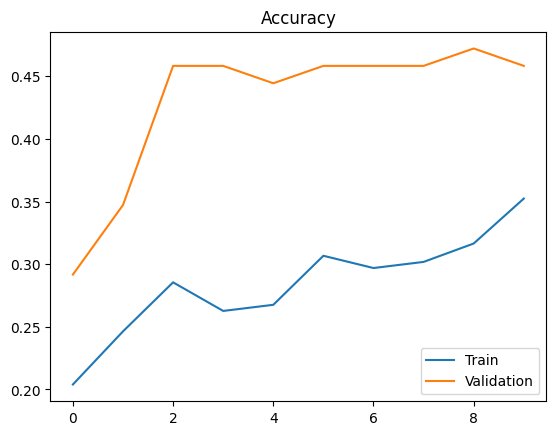

In [13]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Plot training performance
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()
plt.show()


In [14]:
model.save('chest_ctscan_classifier.h5')


In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


In [16]:
model = load_model('chest_ctscan_classifier.h5')


In [17]:
class_labels = ['adenocarcinoma', 'large cell carcinoma', 'squamous cell carcinoma', 'normal']


Saving Screenshot 2025-11-16 230321.png to Screenshot 2025-11-16 230321.png
Uploaded file: Screenshot 2025-11-16 230321.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


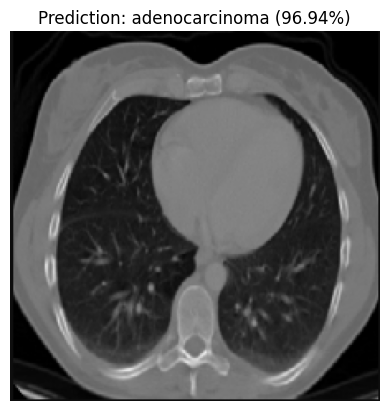

In [18]:
uploaded = files.upload()

for fname in uploaded.keys():
    print(f"Uploaded file: {fname}")

    # Load and preprocess the image
    img = image.load_img(fname, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    preds = model.predict(img_array)
    pred_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # Show result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_labels[pred_class]} ({confidence*100:.2f}%)")
    plt.show()
